# Assignment 5

this assignment you will practice using sklearn and how to create a logistic regression model
- you can download needed data from [here](https://drive.google.com/file/d/1-7xTIgOCfIIHT4C7swecUct_eFHryO_b/view?usp=sharing)


### 1. Import libraries and data frame

- here you need to import `pandas`, `numpy`, `sklearn`, `matplotlib` and `seaborn` libraries to use them.
- then, import needed dataset `train` and assign it with understandable name.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train (1).csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### 2. Explore data
- here you have to do exploratory data analysis and manipulation to understand the data
- then, define problems (dtype or NaN), solve them if there is any.

In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### 3. Separate & Divide
- separate data into feature column/s and target column.
- target column in `price_range`
- features could be all columns except target column
- then,  divide data into training and test sets.

In [4]:
X = df.drop(['price_range'] , axis=1)
y = df['price_range']

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0   battery_power   8.076717
1            blue   1.981927
2     clock_speed   4.260479
3        dual_sim   2.015006
4              fc   3.413529
5          four_g   3.194321
6      int_memory   3.961239
7           m_dep   3.911115
8       mobile_wt  12.972548
9         n_cores   4.646070
10             pc   6.228797
11      px_height   4.262680
12       px_width  11.766282
13            ram   4.688608
14           sc_h  11.510780
15           sc_w   3.720867
16      talk_time   4.859144
17        three_g   6.191783
18   touch_screen   1.989078
19           wifi   2.021012


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 4. Build the Logistic Regression Model
- here, you have to build and train a **logistic regression** model

In [12]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [14]:
lreg = LogisticRegression()
lreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
X_test_scaled = scaler.transform(X_test)
y_pred = lreg.predict(X_test_scaled)

### 5. Evaluate performance
- test the model and compare predicted data with real data 
- using confusion matrix and accuracy score is a **must** 
- visualizing the confusion matrix is a **must** 
- using any other performance metrics is a bonus; however, explaining what does it mean is a **must**

In [20]:
accuracy_score(y_test, y_pred)

0.962

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred) 
cf_matrix

array([[122,   2,   0,   0],
       [  3, 103,   4,   0],
       [  0,   5, 116,   4],
       [  0,   0,   1, 140]], dtype=int64)

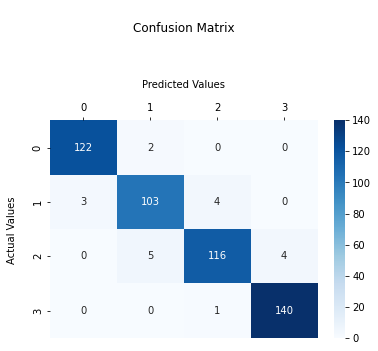

In [22]:
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='Blues')

ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(['0','1','2','3'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
y_test.value_counts()

3    141
2    125
0    124
1    110
Name: price_range, dtype: int64